### Imports

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

from sklearn                 import datasets
from sklearn.model_selection import train_test_split

### Helper Funtions

In [2]:
def mse(y_test, predictions):
    return np.mean((y_test - predictions) ** 2)


def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

## KNN

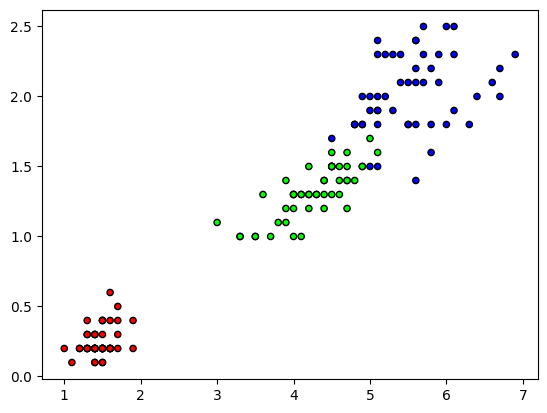

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
0.9666666666666667


In [3]:
from matplotlib.colors       import ListedColormap
from ml_algorithms import KNN

cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolors='k', s=20)
plt.show()

clf = KNN(k=5)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

## Linear Regression

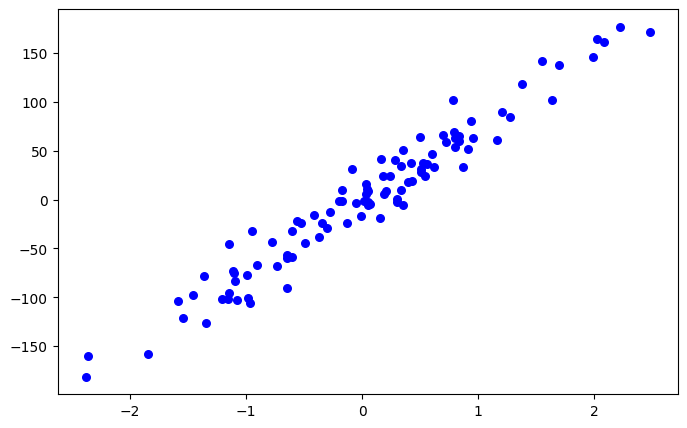

In [4]:
from ml_algorithms import LinearRegression

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,5))
plt.scatter(X[:,0], y, color='b', marker='o', s=30)
plt.show()

In [5]:
# Regressor

reg = LinearRegression(lr=0.01)
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)

# error mse
mse = mse(y_test, predictions)

print(mse)

305.7719958301902


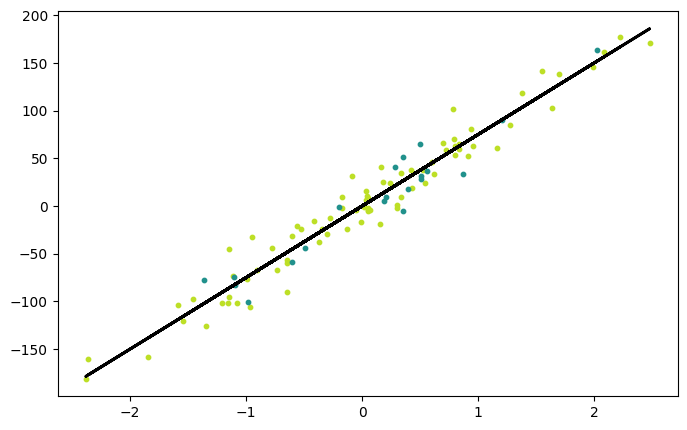

In [6]:
y_pred_line = reg.predict(X)

cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,5))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()


## Logistic Regression

In [7]:
from ml_algorithms import LogisticRegression

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# classifier
clf = LogisticRegression(lr=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy(y_pred, y_test)
print(acc)

c:\Users\debora.craveiro.HIDROMOD\Study\ML-Implementation\ml_algorithms\LogisticRegression.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.9210526315789473


## Naive Bayes Classifier 

In [8]:
from ml_algorithms import NaiveBayes

X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# call classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print('Naive Bayes classification accuracy = ', accuracy(predictions, y_test))

Naive Bayes classification accuracy =  0.965


## Principal Component Analysis

Shape of X =  (150, 4)
Shape of transformed X =  (150, 2)


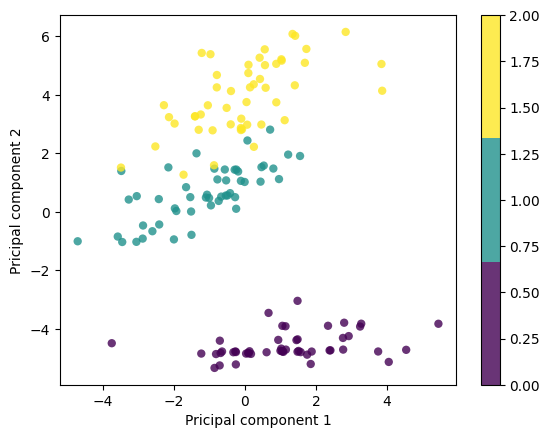

In [9]:
from ml_algorithms import PCA

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X = ', X.shape)
print('Shape of transformed X = ', X_projected.shape)

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Pricipal component 1')
plt.ylabel('Pricipal component 2')
plt.colorbar()
plt.show()